# 1. Seaborn Introduction

Pengantar perpustakaan Seaborn dan di mana ia cocok dalam lanskap visualisasi Python.

## Introduction to Seaborn

### Seaborn foundation

Perpustakaan apa yang menyediakan dasar untuk Pandas dan plotting Seaborn?

**Answer** : Matplotlib adalah dasar bagi banyak perpustakaan plotting python. Pemahaman dasar matplotlib sangat membantu untuk lebih memahami Seaborn.

### Reading a csv file

Sebelum Anda menganalisis data, Anda harus membaca data menggunakan [pandas](https://pandas.pydata.org/) DataFrame. Dalam latihan ini, Anda akan melihat data dari US School Improvement Grants pada tahun 2010. Program ini memberikan hampir $4 milyar kepada sekolah untuk membantu mereka merenovasi atau meningkatkan program mereka.

Langkah pertama dalam kebanyakan analisis data adalah mengimpor `pandas` dan `seaborn`, kemudian membaca file data untuk menganalisisnya lebih lanjut.

*Kursus ini memperkenalkan banyak konsep baru, jadi jika Anda memerlukan referensi cepat, unduh [Seaborn Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/f9f06e72-519a-4722-9912-b5de742dbac4).*

In [1]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assign file url
grant_file = 'datasets/schoolimprovement2010grants.csv'

# Read in the DataFrame
df = pd.read_csv(grant_file)

**Note** : Anda telah menggunakan nama yang benar untuk mengimpor pandas dan Seaborn dan berhasil membaca data dari file csv. Anda siap menganalisis data.

### Comparing a histogram and distplot

Perpustakaan `pandas` mendukung plot data sederhana, yang sangat nyaman ketika data sudah cenderung berada dalam panda DataFrame.

Seaborn umumnya melakukan lebih banyak analisis statistik pada data dan dapat memberikan wawasan yang lebih canggih tentang data. Dalam latihan ini, kita akan membandingkan `pandas` histogram vs `seaborn` distplot.

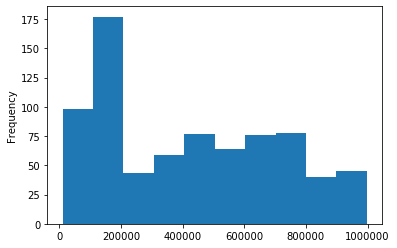

<Figure size 432x288 with 0 Axes>

In [2]:
# Display pandas histogram
df['Award_Amount'].plot.hist()
plt.show()

# Clear out the pandas histogram
plt.clf()

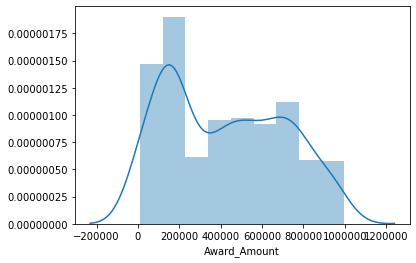

<Figure size 432x288 with 0 Axes>

In [3]:
# Display a Seaborn distplot
sns.distplot(df['Award_Amount'])
plt.show()

# Clear the distplot
plt.clf()

**Note** : Perhatikan bagaimana pandas dan Seaborn plot saling melengkapi. Keduanya menunjukkan distribusi data dalam format yang berbeda

## Using the distribution plot

### Plot a histogram

Fungsi `distplot()` akan mengembalikan Kernel Density Estimate (KDE) secara default. KDE membantu memperlancar distribusi dan merupakan cara yang berguna untuk melihat data. Namun, Seaborn juga dapat mendukung pendekatan histogram yang lebih standar jika itu lebih bermakna untuk analisis Anda.

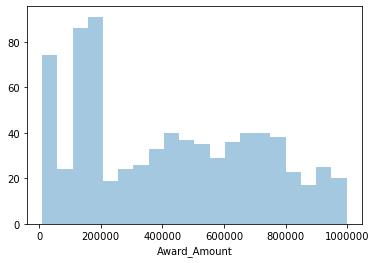

In [5]:
# Create a distplot
sns.distplot(df['Award_Amount'],
             kde=False,
             bins=20)

# Display the plot
plt.show()

**Note** : Fungsi `distplot()` dapat dikonfigurasi dengan beberapa argumen berbeda. Dengan menonaktifkan output KDE, Anda telah membuat histogram.

### Rug plot and kde shading

Sekarang setelah Anda memahami beberapa argumen fungsi untuk `distplot()`, kita dapat melanjutkan lebih lanjut untuk menyempurnakan output. Proses menciptakan visualisasi dan memperbaruinya secara bertahap adalah pendekatan yang berguna dan umum untuk melihat data dari berbagai perspektif.

Seaborn unggul dalam membuat proses ini sederhana.

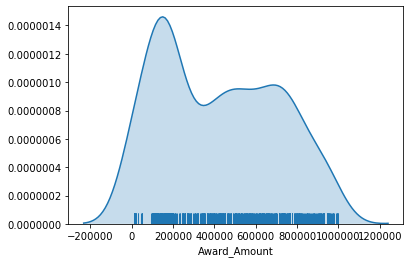

In [6]:
# Create a distplot of the Award Amount
sns.distplot(df['Award_Amount'],
             hist=False,
             rug=True,
             kde_kws={'shade':True})

# Plot the results
plt.show()

**Note** : Plot ini dapat sangat berguna untuk memahami bagaimana penghargaan dalam dolar didistribusikan.

### Interpreting the results

Melihat `distplot` diatas, apa yang dapat Anda simpulkan berdasarkan visualisasi tersebut?

**Answer** : Ada kelompok besar jumlah hadiah `< $400` ribu. 375 dari 757 penghargaan adalah <= `$400k`. Wawasan ini dapat bermanfaat untuk analisis lebih lanjut.

## Regression Plots in Seaborn

### Create a regression plot

Untuk rangkaian latihan ini, kita akan melihat data **FiveThirtyEight** di mana Negara Bagian AS memiliki driver terburuk. Kumpulan data mencakup informasi tingkat ringkasan tentang kecelakaan fatal serta premi asuransi untuk setiap negara bagian pada 2010.

Dalam latihan ini, kita akan melihat perbedaan antara fungsi plot regresi.

In [9]:
# Load data
df = pd.read_csv("datasets/insurance_premiums.csv")

# Print data
df.head()

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


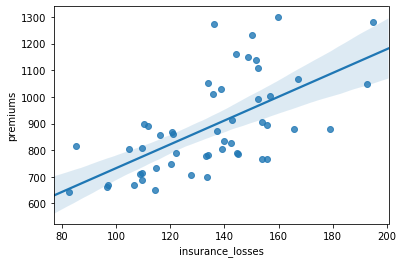

In [10]:
# Create a regression plot using regplot()
sns.regplot(x="insurance_losses", y="premiums", data=df)

# Show plot
plt.show()

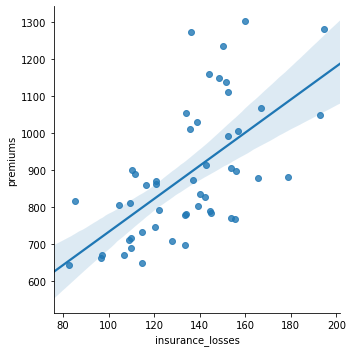

In [11]:
# Create a regression plot using lmplot()
sns.lmplot(x="insurance_losses", y="premiums", data=df)

# Show plot
plt.show()

**Note** : Perhatikan bagaimana output terlihat mirip. Dalam latihan selanjutnya, kami akan mendemonstrasikan opsi tambahan yang tersedia saat menggunakan `lmplot`.

### Plotting multiple variables

Karena kita menggunakan `lmplot()` sekarang, kita dapat melihat interaksi data yang lebih kompleks. Kumpulan data ini mencakup informasi geografis berdasarkan negara dan wilayah. Mungkin menarik untuk melihat apakah ada perbedaan dalam hubungan berdasarkan `Region` dari suatu negara.

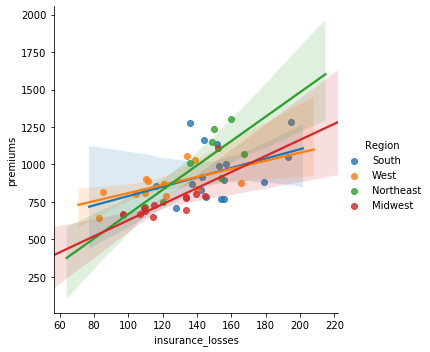

In [12]:
# Create a regression plot using hue
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           hue="Region")

# Show the results
plt.show()

**Note** : Hasilnya agak sulit dibaca. Mungkin menggunakan beberapa baris bukanlah pendekatan terbaik. Mari kita coba yang lain di latihan selanjutnya.

### Facetting multiple regressions

`lmplot()` memungkinkan kita untuk menampilkan data di banyak baris dan kolom. Dalam plot sebelumnya, beberapa baris sulit dibaca dalam satu plot. Kami dapat mencoba membuat beberapa plot berdasarkan `Region` untuk melihat apakah itu visualisasi yang lebih bermanfaat.

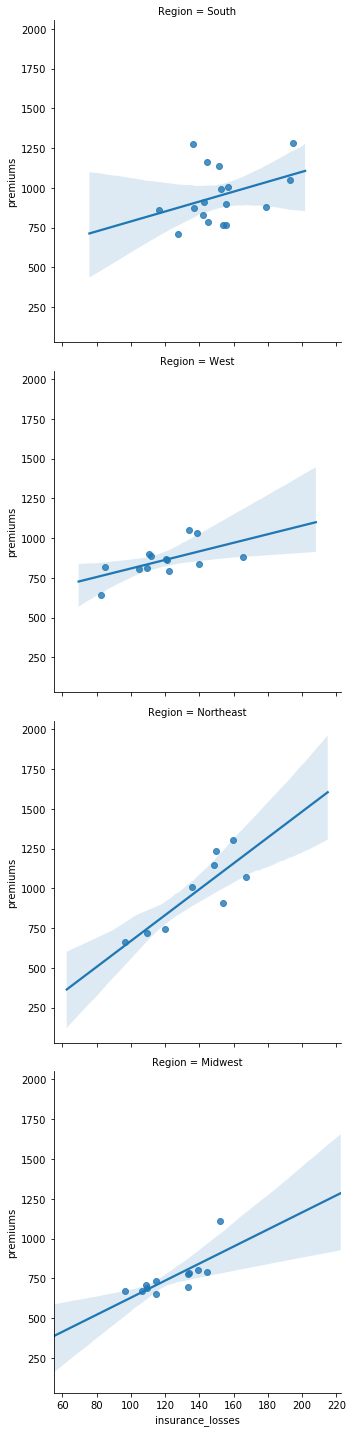

In [15]:
# Create a regression plot with multiple rows
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           row="Region")

# Show the plot
plt.show()

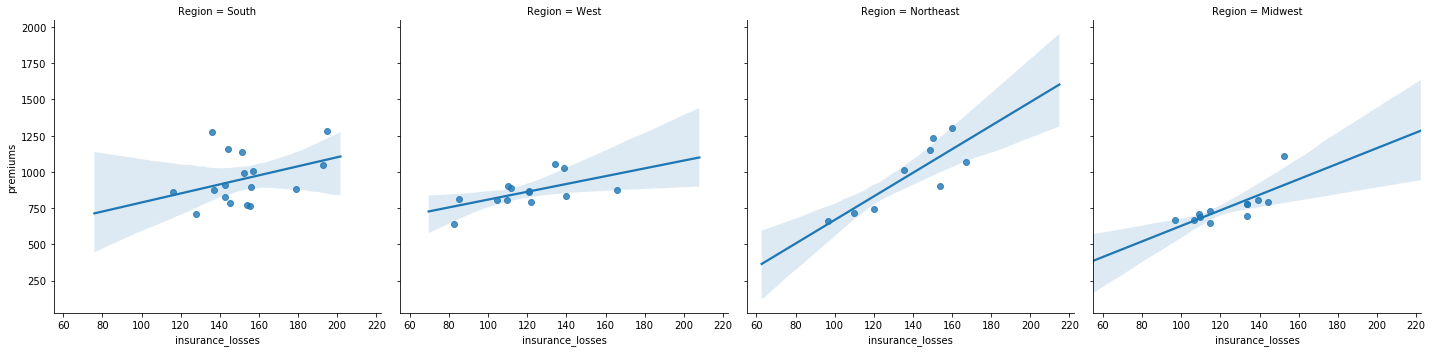

In [16]:
# Create a regression plot with multiple col
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           col="Region")

# Show the plot
plt.show()

**Note** : Menghadapi data di beberapa baris atau kolom bisa menjadi cara yang baik untuk melihat interaksi variabel dalam data. Fungsi `lmplot` mendukung memplot data regresi berdasarkan kolom, baris, dan rona/hue. Konsep ini digunakan berulang kali di seluruh Seaborn.